In [1]:
from matplotlib import pyplot as plt

import torch
import pandas as pd

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
FILENAME = "/home/nsagan/experiments/results/Loftq_LPLR_comparsion.csv"
df = pd.read_csv(FILENAME)

In [4]:
df

,Layer Name,n,d,LoftQ (2B),LoftQ (4B),Loftq-LPLR (2B),Loftq-LPLR (4B)
0,model.layers.0.self_attn.q_proj.weight,4096,4096,0.358871,0.077830,0.358876,0.077761
1,model.layers.0.self_attn.k_proj.weight,4096,1024,0.393332,0.071025,0.393368,0.071049
2,model.layers.0.self_attn.v_proj.weight,4096,1024,0.460505,0.071557,0.460411,0.071516
3,model.layers.0.self_attn.o_proj.weight,4096,4096,0.484551,0.080682,0.484514,0.080693
4,model.layers.0.mlp.gate_proj.weight,14336,4096,0.489964,0.083940,0.489983,0.083947
...,...,...,...,...,...,...,...
174,model.layers.24.mlp.down_proj.weight,14336,4096,0.501983,0.083655,0.501961,0.083655
175,model.layers.25.self_attn.q_proj.weight,4096,4096,0.494289,0.080798,0.494246,0.080802
176,model.layers.25.self_attn.k_proj.weight,4096,1024,0.469170,0.074677,0.469072,0.074698
177,model.layers.25.self_attn.v_proj.weight,4096,1024,0.477927,0.073237,0.477932,0.073236


### Plots

#### Legend:
**(1)** Relative Frobenius Norm Errors on Mistral Weights: LoftQ vs. LoftQ-LPLR. For both, the full quantized matrix has two bits of precision, and the rank of the low-rank components is 64. For LoftQ, the factors have full precision, and, for LoftQ-LPLR, all factors have 8 bits of precision.

**(2)** Same as (1), but the full quantized matrix has four bits of precision.

In [2]:
loftq_bits = 4096**2 * 4 + 64 * 16 * (4096 * 2)
loftq_lplr_bits = 4096**2 * 4 + 64 * 8 * (4096 * 2)

In [5]:
64 * 16 * (4096 * 2) / loftq_bits

0.1111111111111111

In [6]:
64 * 8 * (4096 * 2) / loftq_lplr_bits

0.058823529411764705

In [3]:
loftq_lplr_bits / loftq_bits

0.9444444444444444

In [7]:
loftq_bits = 4096**2 * 2 + 64 * 16 * (4096 * 2)
loftq_lplr_bits = 4096**2 * 2 + 64 * 8 * (4096 * 2)

In [8]:
loftq_lplr_bits / loftq_bits

0.9

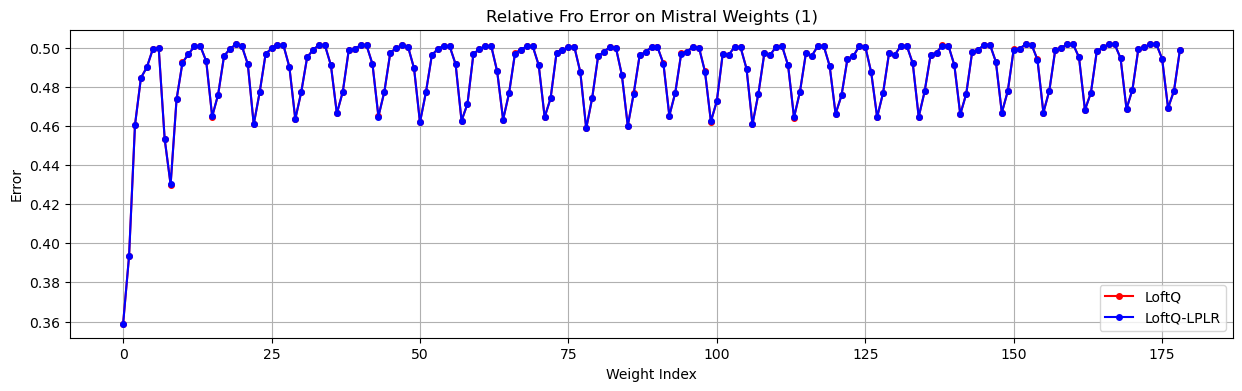

In [5]:
plt.figure(figsize=(15, 4))
plt.title("Relative Fro Error on Mistral Weights (1)")
plt.plot(
    df["LoftQ (2B)"], label="LoftQ", 
    color='r', marker='o', linestyle='-', markersize=4
)
plt.plot(df["Loftq-LPLR (2B)"], label="LoftQ-LPLR",
    color='b', marker='o', linestyle='-', markersize=4
)
plt.xlabel("Weight Index")
plt.ylabel("Error")
plt.grid(True)
plt.legend()

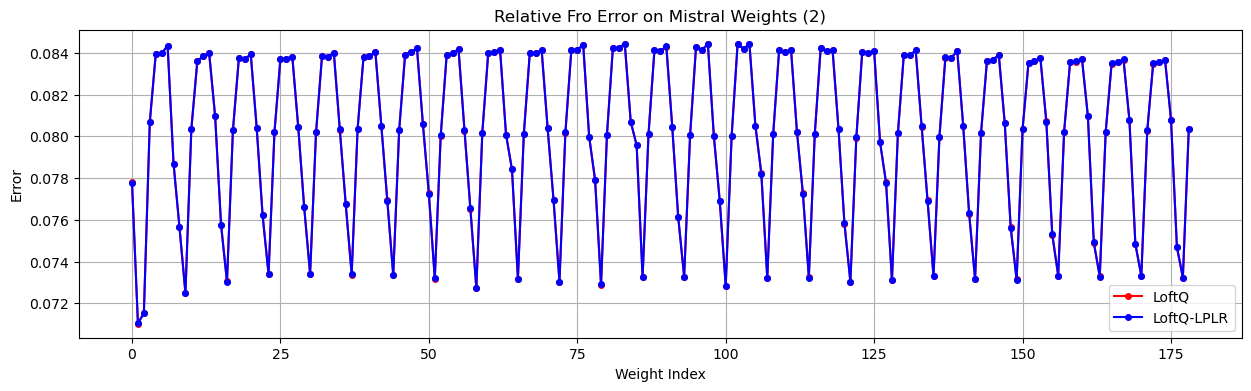

In [6]:
plt.figure(figsize=(15, 4))
plt.title("Relative Fro Error on Mistral Weights (2)")
plt.plot(
    df["LoftQ (4B)"], label="LoftQ", 
    color='r', marker='o', linestyle='-', markersize=4
)
plt.plot(df["Loftq-LPLR (4B)"], label="LoftQ-LPLR",
    color='b', marker='o', linestyle='-', markersize=4
)
plt.xlabel("Weight Index")
plt.ylabel("Error")
plt.grid(True)
plt.legend()

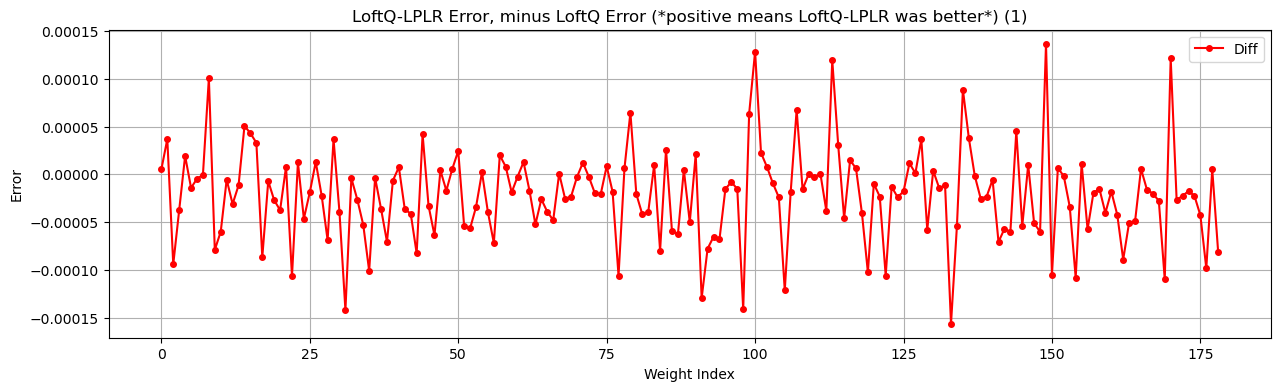

In [12]:
plt.figure(figsize=(15, 4))
plt.title("LoftQ-LPLR Error, minus LoftQ Error (*positive means LoftQ-LPLR was better*) (1)")
plt.plot(
    df["Loftq-LPLR (2B)"]- df["LoftQ (2B)"], label="Diff", 
    color='r', marker='o', linestyle='-', markersize=4
)
plt.grid(True)
plt.xlabel("Weight Index")
plt.ylabel("Error")
plt.legend()

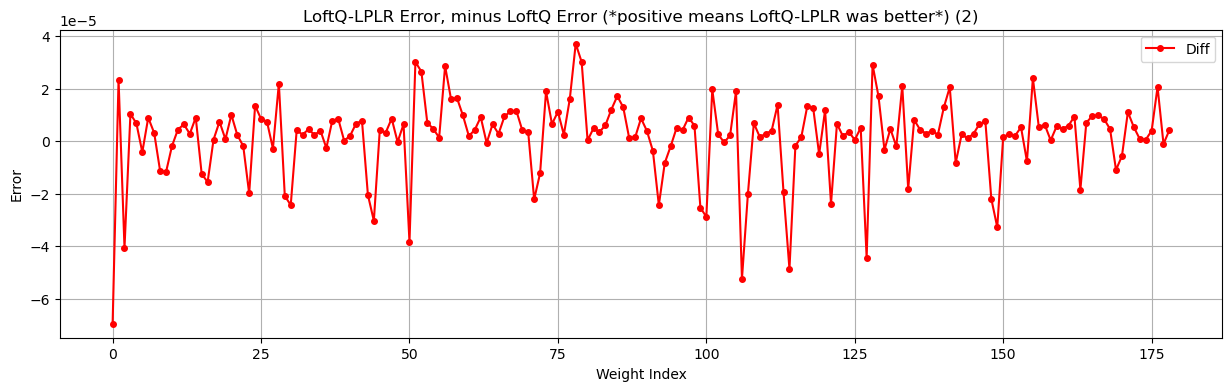

In [13]:
plt.figure(figsize=(15, 4))
plt.title("LoftQ-LPLR Error, minus LoftQ Error (*positive means LoftQ-LPLR was better*) (2)")
plt.plot(
    (df["Loftq-LPLR (4B)"]- df["LoftQ (4B)"]), label="Diff", 
    color='r', marker='o', linestyle='-', markersize=4
)
plt.grid(True)
plt.xlabel("Weight Index")
plt.ylabel("Error")
plt.legend()